This notebook plots the nearest MC Histograms in 

In [28]:
#import packages and initialize settings
import os
import numpy as np
from astropy.io import fits
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table, join
from astropy.io import ascii
import seaborn as sns

# Plotting parameters
plt.rc('text',usetex=True)
fontsize=20
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
sns.color_palette("dark")
wisteria = "#9371af"
cashmere = "#4f718c"
ruby = "#b04570"

# Import personal packages
import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
from deprojectGalaxy import deproject

In [14]:
# Import data

database = Table.read('../Data/3.SNe+GalData.csv', format = "csv")
histTable = Table.read('../Data/3.HistData.csv', format='csv')  
histTable[0:1]
allData = Table.read('../Data/3.4.AllData.csv', format='csv')

model1_10e55 = Table.read('/home/mayker.1/Desktop/SNeCO_Data_Products/Model1_Random_Results_Mass_10E55.txt', format = "ascii")
model1_10e6  = Table.read('/home/mayker.1/Desktop/SNeCO_Data_Products/Model1_Random_Results_Mass_10E6.txt', format = "ascii")
model1_10e65 = Table.read('/home/mayker.1/Desktop/SNeCO_Data_Products/Model1_Random_Results_Mass_10E65.txt', format = "ascii")
model2_10e55 = Table.read('/home/mayker.1/Desktop/SNeCO_Data_Products/Model2_GasDistribution_Results_Mass_10E55.txt', format = "ascii")
model2_10e6  = Table.read('/home/mayker.1/Desktop/SNeCO_Data_Products/Model2_GasDistribution_Results_Mass_10E6.txt', format = "ascii")
model2_10e65 = Table.read('/home/mayker.1/Desktop/SNeCO_Data_Products/Model2_GasDistribution_Results_Mass_10E65.txt', format = "ascii")


In [44]:
# Galaxy. Mass, Dist(pc), run, randx, randy
model1_10e55[0:1]

col1,col2,col3,col4,col5,col6
str8,float64,float64,int64,float64,float64
circinus,678456.5682064224,136.4895793801001,0,-0.019956852884908154,-0.04496455918261462


In [46]:
# Get list of cleaned SN type
SNtypes = []

for i in range(len(allData)):
    if len(allData["SN_type"][i]) < 2:
        SNtypes.append("Unclassified")
    elif allData["SN_type"][i][1]=="b" or allData["SN_type"][i][1]=="c" :
        SNtypes.append("Ib/c")
    elif allData["SN_type"][i][1]=="I":
        SNtypes.append("II")    
    elif allData["SN_type"][i][1]=="a":
        SNtypes.append("Ia") 
    elif allData["SN_type"][i][1]=="n":
        SNtypes.append("Unclassified")
    else: 
        print("something fucked up")        
print(SNtypes)

def cleanHist(distArr, valArr, typeArr):
    # Remove nans and negative values from histogram
    cleanDist, cleanVals, cleanTypes = [],[],[]
    for i in range(len(distArr)):
        if np.isfinite(distArr[i]) and distArr[i] >= 0.0:
            cleanDist.append(distArr[i])
            cleanVals.append(valArr[i])
            cleanTypes.append(typeArr[i])
    for i in range(len(cleanDist)):
        if cleanDist[i] >= 1000:
            cleanDist[i] = 1001
    return(cleanDist, cleanVals, cleanTypes)
            
Dist55_ca, vals55_ca, types55_ca = cleanHist(histTable["MCSN55Int"],histTable["MCSN55Intval"], SNtypes)
Dist6_ca, vals6_ca, types6_ca = cleanHist(histTable["MCSN6Int"],histTable["MCSN6Intval"], SNtypes)
Dist65_ca, vals65_ca, types65_ca = cleanHist(histTable["MCSN65Int"],histTable["MCSN65Intval"], SNtypes)
Dist55_mda, vals55_mda, types55_mda = cleanHist(histTable["MCSN55Mass"],histTable["MCSN55Massval"], SNtypes)
Dist6_mda, vals6_mda, types6_mda = cleanHist(histTable["MCSN6Mass"],histTable["MCSN6Massval"], SNtypes)
Dist65_mda, vals65_mda, types65_mda = cleanHist(histTable["MCSN65Mass"],histTable["MCSN65Massval"], SNtypes)   

def cleanHistSNR(SNRArr, valArr):
    cleanSNR, cleanVals = [],[]
    for i in range(len(SNRArr)):
        if np.isfinite(SNRArr[i]) and SNRArr[i] >= 0.0:
            cleanSNR.append(SNRArr[i])
            cleanVals.append(valArr[i])
    return(cleanSNR, cleanVals)

SNR_3_dist, SNR_3_val = cleanHistSNR(histTable["MCSN_SNR_3"],histTable["MCSN_SNR_3_val"])
SNR_7_dist, SNR_7_val = cleanHistSNR(histTable["MCSN_SNR_7"],histTable["MCSN_SNR_7_val"])


def cleanModelHist(distArr, valArr):
    # Remove nans and negative values from histogram
    cleanDist, cleanVals = [],[]
    for i in range(len(distArr)):
        if np.isfinite(distArr[i]) and distArr[i] >= 0.0:
            cleanDist.append(distArr[i])
            cleanVals.append(valArr[i])
    for i in range(len(cleanDist)):
        if cleanDist[i] >= 1000:
            cleanDist[i] = 1001
    return(cleanDist, cleanVals)

mod1_55D, mod1_55V = cleanModelHist(model1_10e55["col3"], model1_10e55["col2"])
mod1_6D,  mod1_6V  = cleanModelHist(model1_10e6["col3"],  model1_10e6["col2"])
mod1_65D, mod1_65V = cleanModelHist(model1_10e65["col3"], model1_10e65["col2"])
mod2_55D, mod2_55V = cleanModelHist(model2_10e55["col3"], model2_10e55["col2"])
mod2_6D,  mod2_6V  = cleanModelHist(model2_10e6["col3"],  model2_10e6["col2"])
mod2_65D, mod2_65V = cleanModelHist(model2_10e65["col3"], model2_10e65["col2"])

['II', 'Unclassified', 'II', 'II', 'Unclassified', 'Unclassified', 'Unclassified', 'Unclassified', 'Unclassified', 'Ia', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'Ia', 'Ib/c', 'Ib/c', 'II', 'II', 'Ia', 'II', 'II', 'II', 'II', 'Ia', 'Ia', 'II', 'Ia', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'Ib/c', 'Ib/c', 'Ia', 'Ia', 'II', 'II', 'II', 'Unclassified', 'II', 'II', 'Ia', 'II', 'II', 'Ia', 'Ia', 'II', 'Ib/c', 'Ia', 'II', 'II', 'Ib/c', 'II', 'Ib/c', 'II', 'II', 'II', 'Ia', 'Ib/c']


In [17]:
# Probably won't need to run this again, just keeping all the data organized

#histTable.add_column(database['SN_name'],  name = "SN_name")
#allData = join(database, histTable, keys = "SN_name")
#allData
#ascii.write(allData, '../Data/3.4.AllData.csv', format='csv', fast_writer=False, overwrite=True)  

[[41.  6.  3.  5.  1.  1.  0.  1.  1.  1.  1.]
 [42.  5.  6.  3.  1.  0.  0.  1.  1.  1.  1.]]


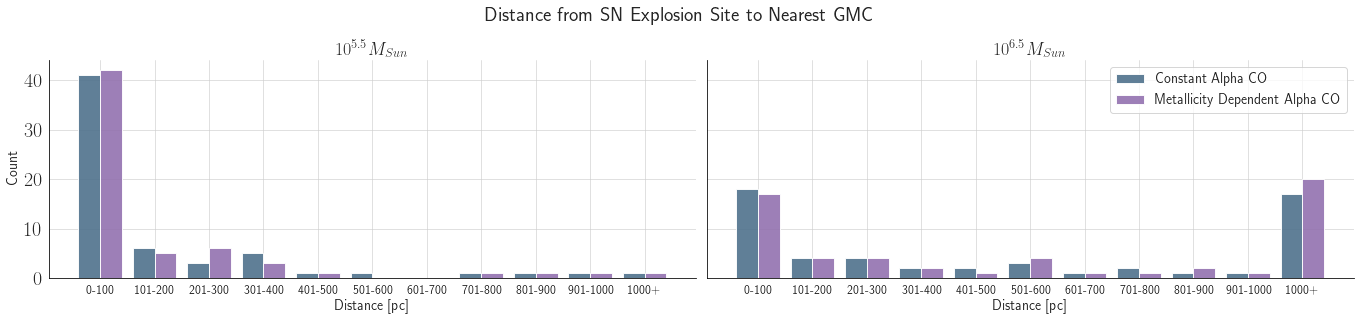

In [18]:
# Make histogram of nearest MC 10^5.5 & 6.5

#set up bins
#bins = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100]
ticks = [50,150,250,350,450,550,650,750,850,950,1050]
tickLabels = ["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"]

sns.set_style("whitegrid", {'axes.linewidth': 1, 'axes.edgecolor':'black'})
sns.color_palette("dark")

f, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = True, figsize = (19,4.5))

ax[0].set_xticks(ticks=ticks)
ax[1].set_xticks(ticks=ticks)
ax[0].set_xticklabels(["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"],fontsize = 12)
ax[1].set_xticklabels(["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"],fontsize = 12)
#ax[0].set_xticklabels(["0", "100", "200", "300", "400", "500", "600", "700", "800", "900", "1000"])
#ax[1].set_xticklabels(["0", "100", "200", "300", "400", "500", "600", "700", "800", "900", "1000"])
n1, bins, patches = ax[0].hist([Dist55_ca,Dist55_mda], color = [cashmere, wisteria],label = ["Constant Alpha CO","Metallicity Dependent Alpha CO"], bins=bins, width = 40, alpha = 0.9)
ax[1].hist([Dist65_ca,Dist65_mda], color = [cashmere, wisteria],label = ["Constant Alpha CO","Metallicity Dependent Alpha CO"], bins=bins, width = 40, alpha = 0.9)
ax[0].grid(True, alpha = 0.75)
ax[1].grid(True, alpha = 0.75)
ax[0].set_title(r'$10^{5.5} M_{Sun}$', fontsize = 18)
ax[1].set_title(r'$10^{6.5} M_{Sun}$', fontsize = 18)
f.suptitle("Distance from SN Explosion Site to Nearest GMC", fontsize = 20)
f.subplots_adjust(wspace = 0.1, top = 0.85)
ax[1].legend(loc = "upper right", fontsize = 14)
ax[0].set_ylabel("Count", fontsize = 14)
ax[0].set_xlabel("Distance [pc]", fontsize = 14)
ax[1].set_xlabel("Distance [pc]", fontsize = 14)
sns.despine(left = False)
plt.tight_layout()

f.savefig("../Figures/NearestMCHist.png")
print(n1)

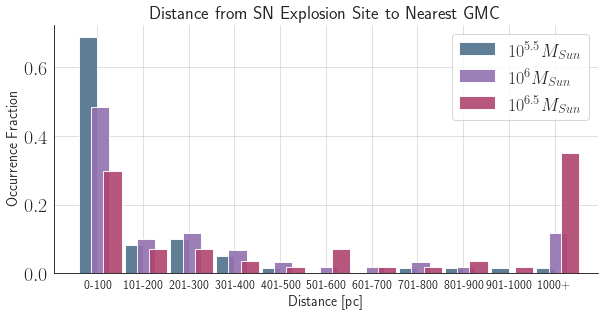

In [29]:
# Make histogram of nearest MC 10^5.5 & 6.5

#set up bins
#bins = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100]
ticks = [50,150,250,350,450,550,650,750,850,950,1050]
tickLabels = ["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"]

sns.set_style("whitegrid", {'axes.linewidth': 1, 'axes.edgecolor':'black'})
sns.color_palette("dark")

f, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (8.5,4.5))

weights55 = np.ones(len(Dist55_mda))/len(Dist55_mda)
weights6 = np.ones(len(Dist6_mda))/len(Dist6_mda)
weights65 = np.ones(len(Dist65_mda))/len(Dist65_mda)


ax.set_xticks(ticks=ticks)
ax.set_xticklabels(["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"],fontsize = 12)
#ax.set_xticklabels(["0", "100", "200", "300", "400", "500", "600", "700", "800", "900", "1000"])
n1, bins, patches = ax.hist([Dist55_mda,Dist6_mda,Dist65_mda], weights = [weights55,weights6,weights65], color = [cashmere, wisteria, ruby],label = [r'$10^{5.5} M_{Sun}$',r'$10^{6} M_{Sun}$',r'$10^{6.5} M_{Sun}$'], bins=bins, width = 40, alpha = 0.9)
ax.grid(True, alpha = 0.75)
ax.set_title("Distance from SN Explosion Site to Nearest GMC", fontsize = 18)
ax.set_ylabel("Occurrence Fraction", fontsize = 14)
ax.set_xlabel("Distance [pc]", fontsize = 14)
plt.legend(loc="upper right", fontsize = 18)
sns.despine(left = False)
plt.tight_layout()

f.savefig("../Figures/NearestMCHistMDA.png")

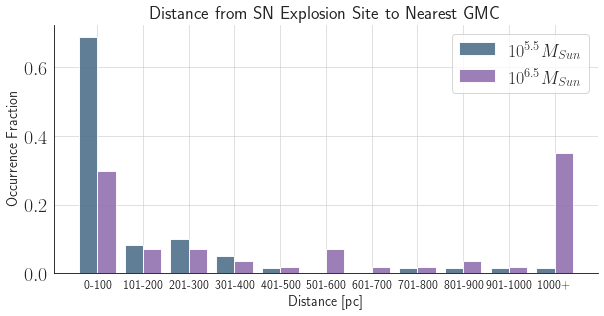

In [30]:
# Make histogram of nearest MC 10^5.5 & 6.5

sns.set_style("whitegrid", {'axes.linewidth': 1, 'axes.edgecolor':'black'})
sns.color_palette("dark")

f, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (8.5,4.5))


ax.set_xticks(ticks=ticks)
ax.set_xticklabels(["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"],fontsize = 12)
n1, bins, patches = ax.hist([Dist55_mda,Dist65_mda], weights = [weights55,weights65], color = [cashmere, wisteria],label = [r'$10^{5.5} M_{Sun}$',r'$10^{6.5} M_{Sun}$'], bins=bins, width = 40, alpha = 0.9)
ax.grid(True, alpha = 0.75)
ax.set_title("Distance from SN Explosion Site to Nearest GMC", fontsize = 18)
ax.set_ylabel("Occurrence Fraction", fontsize = 14)
ax.set_xlabel("Distance [pc]", fontsize = 14)
plt.legend(loc="upper right", fontsize = 18)
sns.despine(left = False)
plt.tight_layout()

f.savefig("../Figures/NearestMCHistMDA.png")

[[43.  8.  4.  3.  1.  0.  0.  0.  1.  0.  0.]
 [32.  8.  4.  2.  4.  2.  1.  3.  1.  1.  1.]]


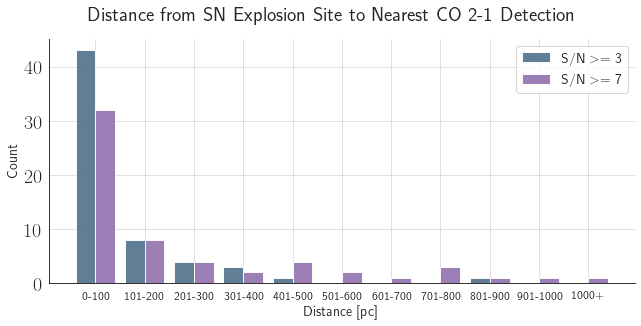

In [7]:
# Make histogram of nearest MC 10^5.5 & 6.5

#set up bins
#bins = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
bins = [0,100,200,300,400,500,600,700,800,900,1000,1100]
ticks = [50,150,250,350,450,550,650,750,850,950,1050]
tickLabels = ["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"]

sns.set_style("whitegrid", {'axes.linewidth': 1, 'axes.edgecolor':'black'})
sns.color_palette("dark")

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10.5,4.5))

ax.set_xticks(ticks=ticks)
ax.set_xticklabels(["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"], fontsize = 12)
n,bins,patches = ax.hist([SNR_3_dist,SNR_7_dist], color = [cashmere, wisteria],label = [r"S/N $>=$ 3",r"S/N $>=$ 7"], bins=bins, width = 40, alpha = 0.9)
ax.grid(True, alpha = 0.75)
f.suptitle("Distance from SN Explosion Site to Nearest CO 2-1 Detection", fontsize = 20)
ax.legend(loc = "upper right", fontsize = 14)
ax.set_ylabel("Count", fontsize = 14)
ax.set_xlabel("Distance [pc]", fontsize = 14)

sns.despine(left = False)

f.savefig("../Figures/NearestMCHist_SNR.png")
print(n)

In [8]:
allData = Table.read('../Data/3.4.AllData.csv', format='csv')

allData

galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,ImageFile150,ErrFile150,AlphaCOFile,Names,MCSN55Int,MCSN55Intval,MCSN6Int,MCSN6Intval,MCSN65Int,MCSN65Intval,MCSN7Int,MCSN7Intval,MCSN75Int,MCSN75Intval,MCSN55Mass,MCSN55Massval,MCSN6Mass,MCSN6Massval,MCSN65Mass,MCSN65Massval,MCSN7Mass,MCSN7Massval,MCSN75Mass,MCSN75Massval,MCSN_SNR_7,MCSN_SNR_7_val,MCSN_SNR_9,MCSN_SNR_9_val,MCSN_SNR_1,MCSN_SNR_1_val,MCSN_SNR_3,MCSN_SNR_3_val,MCSN_SNR_5,MCSN_SNR_5_val
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str112,str113,str74,str20,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ngc1566,ASASSN-14ha,II,65.0059,-54.9381,258.9038295074317,423.1062029210927,68.05383,1.8849889,12.188041,0.0003484111476313,65.00159,-54.93801,17.69,214.7,29.5,216.83093,12m+7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1566/ngc1566_12m+7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc1566/ngc1566_12m+7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/NGC1566_alphaCO21_Sun+20.fits,ngc1566_ASASSN-14ha_,7.168330791430105,61.926334381103516,7.168330791430105,61.926334381103516,7.168330791430105,61.926334381103516,7.168330791430105,61.926334381103516,577.5910393511059,189.28466796875,7.168330791430105,61.926334381103516,7.168330791430105,6794518.579826997,7.168330791430105,6794518.579826997,540.1480500825826,10247495.735757168,626.9203700447346,31862605.53927886,7.168330791430105,45.56260681152344,7.168330791430105,45.56260681152344,7.168330791430105,45.56260681152344,7.168330791430105,45.56260681152344,7.168330791430105,45.56260681152344
ngc4321,SN1901B,I,185.6971,15.8238,545.5920792633563,276.5735561756638,5.0824146,1.0344207,2.544713,0.000462934650464,185.72887,15.822304,15.21,156.2,38.5,182.86105,12m+7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc4321/ngc4321_12m+7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc4321/ngc4321_12m+7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/NGC4321_alphaCO21_Sun+20.fits,ngc4321_SN1901B_,16.217608974124317,5.4790143966674805,32.95206950182446,6.2370805740356445,375.2361429425682,20.15619659423828,5429.02766974846,58.92905044555664,9348.094692036415,186.10044860839844,16.217608974124317,5.4790143966674805,16.217608974124317,1053493.1724780116,354.5195224142885,3342420.1186717595,5465.47290014249,10169412.927852659,9838.242679663315,32548988.676900666,32.95206950182446,7.592727184295654,74.35152882558509,9.115458488464355,16.217608974124317,6.640030384063721,16.217608974124317,6.640030384063721,16.217608974124317,6.640030384063721
ngc5236,SN1923A,II,204.2883,-29.8389,399.09014170428725,813.7841220160797,3.1662843,0.6370633,6.310522,0.000594044605435,204.2539,-29.865625,4.89,225.0,24.0,408.43347,12m+7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc5236/ngc5236_12m+7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc5236/ngc5236_12m+7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/NGC5236_alphaCO21_Sun+20.fits,ngc5236_SN1923A_,4.97955838549907,2.6020655632019043,165.25801448750806,6.16483211517334,701.2762889030039,18.5152530670166,1327.7521680207906,60.38484573364258,3136.7306821082784,189.17770385742188,4.97955838549907,2.6020655632019043,165.25801448750806,1053035.375,701.2762889030039,3162651.75,1327.7521680207906,10314536.0,3136.7306821082784,32314072.0,4.97955838549907,9.050134658813477,4.97955838549907,9.050134658813477,4.97955838549907,9.050134658813477,4.97955838549

In [9]:
# Here is some rudimentary by type histogram plotting in case we decide to pursue this further.
import pandas as pd
data55 = pd.DataFrame({"type55": types55_mda,
                   "int55" : Dist55_mda})

data65 = pd.DataFrame({"type65": types65_mda,
                   "int65" : Dist65_mda})


<AxesSubplot:xlabel='int55', ylabel='Count'>

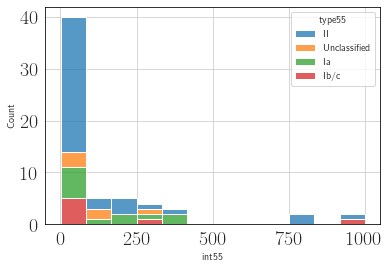

In [10]:
sns.histplot(data55, x="int55", hue="type55", multiple="stack")


<AxesSubplot:xlabel='int65', ylabel='Count'>

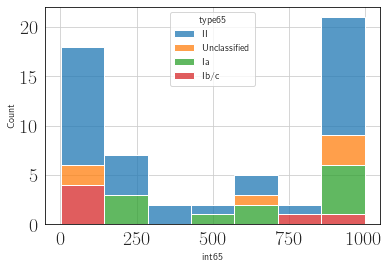

In [11]:
sns.histplot(data65, x="int65", hue="type65", multiple="stack")

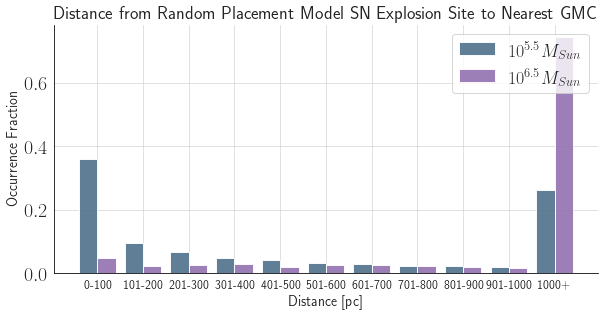

In [50]:
# Now make plots with model data

modWei55 = np.ones(len(mod1_55D))/len(mod1_55D)
modWei65 = np.ones(len(mod1_65D))/len(mod1_65D)


sns.set_style("whitegrid", {'axes.linewidth': 1, 'axes.edgecolor':'black'})
sns.color_palette("dark")

f, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (8.5,4.5))

ax.set_xticks(ticks=ticks)
ax.set_xticklabels(["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"],fontsize = 12)
#n1, bins, patches = ax.hist([Dist55_mda,Dist65_mda], weights = [weights55,weights65], color = [cashmere, wisteria],label = [r'$10^{5.5} M_{Sun}$',r'$10^{6.5} M_{Sun}$'], bins=bins, width = 40, alpha = 0.9)
n1, bins, patches = ax.hist([mod1_55D,mod1_65D], weights = [modWei55,modWei65], color = [cashmere, wisteria],label = [r'$10^{5.5} M_{Sun}$',r'$10^{6.5} M_{Sun}$'], bins=bins, width = 40, alpha = 0.9)
ax.grid(True, alpha = 0.75)
ax.set_title("Distance from Random Placement Model SN Explosion Site to Nearest GMC", fontsize = 18)
ax.set_ylabel("Occurrence Fraction", fontsize = 14)
ax.set_xlabel("Distance [pc]", fontsize = 14)
plt.legend(loc="upper right", fontsize = 18)
sns.despine(left = False)
plt.tight_layout()

f.savefig("../Figures/NearestMCHistModel1.png")



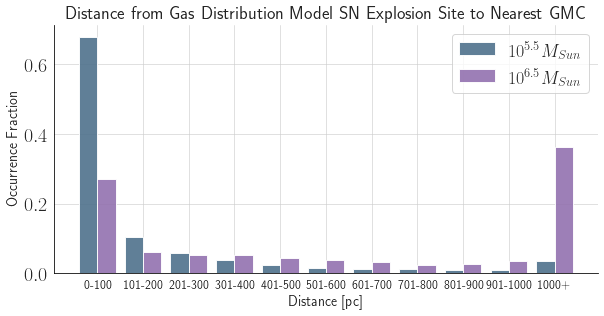

In [49]:
# Now make plots with model data

modWei55 = np.ones(len(mod2_55D))/len(mod2_55D)
modWei65 = np.ones(len(mod2_65D))/len(mod2_65D)


sns.set_style("whitegrid", {'axes.linewidth': 1, 'axes.edgecolor':'black'})
sns.color_palette("dark")

f, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (8.5,4.5))

ax.set_xticks(ticks=ticks)
ax.set_xticklabels(["0-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800", "801-900", "901-1000", "1000+"],fontsize = 12)
#n1, bins, patches = ax.hist([Dist55_mda,Dist65_mda], weights = [weights55,weights65], color = [cashmere, wisteria],label = [r'$10^{5.5} M_{Sun}$',r'$10^{6.5} M_{Sun}$'], bins=bins, width = 40, alpha = 0.9)
n1, bins, patches = ax.hist([mod2_55D,mod2_65D], weights = [modWei55,modWei65], color = [cashmere, wisteria],label = [r'$10^{5.5} M_{Sun}$',r'$10^{6.5} M_{Sun}$'], bins=bins, width = 40, alpha = 0.9)
ax.grid(True, alpha = 0.75)
ax.set_title("Distance from Gas Distribution Model SN Explosion Site to Nearest GMC", fontsize = 18)
ax.set_ylabel("Occurrence Fraction", fontsize = 14)
ax.set_xlabel("Distance [pc]", fontsize = 14)
plt.legend(loc="upper right", fontsize = 18)
sns.despine(left = False)
plt.tight_layout()

f.savefig("../Figures/NearestMCHistModel2.png")

In [ ]:


#Plot Histograms
binNum    = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900]
#binNum    = [0, 25,50,75, 100,150, 200, 250, 300, 350, 400, 450, 500, 550,600, 650,700, 750, 800,850, 900]
minorTicks = [0, 50, 100, 200, 250, 300, 350, 450, 500, 550,600, 700, 750, 800,850]
majorTicks = [150,400,650,900]
# minorTicks = [0,75, 225, 300, 375, 450, 600, 675, 750, 825]
# majorTicks = [150, 525, 900]
color1, color2, color3 = 'deepskyblue', 'magenta', 'black'
label1 = 'From SNe'
label2 = 'From Random'
label3 = 'Beam Radius'
fsize = 18
fig, axs = plt.subplots(1, 5, sharex=False, sharey = True, tight_layout=True)
fig.set_figheight(3)
fig.set_figwidth(13)
plt.tick_params(axis='y', direction = 'in')

axs[0].set_title(r'$10^{5.5} M_{Sun}$', fontsize = fsize)
# axs[0].text(450, 1600, 'AlphaCO', fontsize=14)
# axs[0].text(450, 1800, 'Metallicity', fontsize=14)
# axs[0].text(450, 1700, 'Dependent', fontsize=14)
axs[0].hist(Dist55_mda, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[0].hist(D55, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density=True)
axs[0].axvline(75, color=color3, label = label3)
axs[0].set_xticks(ticks=majorTicks)
axs[0].set_xticks(ticks=minorTicks, minor=True)
axs[0].tick_params(axis='y', direction = 'in')

axs[1].set_title(r'$10^{6} M_{Sun}$', fontsize = fsize)
axs[1].hist(SD6, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[1].hist(D6, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[1].axvline(75, color=color3, label = label3)
axs[1].set_xticks(ticks=majorTicks)
axs[1].set_xticks(ticks=minorTicks, minor=True)
axs[1].tick_params(axis='y', direction = 'in')

axs[2].set_title(r'$10^{6.5} M_{Sun}$', fontsize = fsize)
axs[2].hist(SD65, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[2].hist(D65, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[2].axvline(75, color=color3, label = label3)
axs[2].set_xticks(ticks=majorTicks)
axs[2].set_xticks(ticks=minorTicks, minor=True)
axs[2].tick_params(axis='y', direction = 'in')

axs[3].set_title(r'$10^{7} M_{Sun}$', fontsize = fsize)
axs[3].hist(SD7, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[3].hist(D7, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[3].axvline(75, color=color3, label = label3)
axs[3].set_xticks(ticks=majorTicks)
axs[3].set_xticks(ticks=minorTicks, minor=True)
axs[3].tick_params(axis='y', direction = 'in')

axs[4].set_title(r'$10^{7.5} M_{Sun}$', fontsize = fsize)
axs[4].hist(SD75, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[4].hist(D75, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[4].axvline(75, color=color3, label = label3)
axs[4].set_xticks(ticks=majorTicks)
axs[4].set_xticks(ticks=minorTicks, minor=True)
axs[4].tick_params(axis='y', direction = 'in')

# axs[0].legend(loc='best', fontsize = 14)
# axs[1].legend(loc='best', fontsize = 14)
# axs[2].legend(loc='best', fontsize = 14)
# axs[3].legend(loc='best', fontsize = 14)
axs[4].legend(loc='best', fontsize = 14)


axs[0].set_ylabel('Molecular Clouds', fontsize = 20)
axs[2].set_xlabel('Distance (pc)', fontsize = 20)

fig.savefig('../Figures/3.4_Random_Area.png')


In [ ]:
#Plot Histograms
binNum    = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900]
#binNum    = [0, 25,50,75, 100,150, 200, 250, 300, 350, 400, 450, 500, 550,600, 650,700, 750, 800,850, 900]
minorTicks = [0, 50, 100, 200, 250, 300, 350, 450, 500, 550,600, 700, 750, 800,850]
majorTicks = [150,400,650,900]
# minorTicks = [0,75, 225, 300, 375, 450, 600, 675, 750, 825]
# majorTicks = [150, 525, 900]
color1, color2, color3 = 'deepskyblue', 'magenta', 'black'
label1 = 'Real SNe'
label2 = 'Model'

fsize = 18
fig, axs = plt.subplots(1, 1, sharex=False, sharey = True, tight_layout=True)
fig.set_figheight(8)
fig.set_figwidth(8)
plt.tick_params(axis='y', direction = 'in')

axs.set_title(r'$10^{5.5} M_{Sun}$', fontsize = fsize)
axs.hist(SD55, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs.hist(D255, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density=True)
axs.set_xticks(ticks=majorTicks)
axs.set_xticks(ticks=minorTicks, minor=True)
axs.tick_params(axis='y', direction = 'in')


axs.legend(loc='best', fontsize = 14)


axs.set_ylabel('Molecular Clouds', fontsize = 20)
axs.set_xlabel('Distance (pc)', fontsize = 20)

fig.savefig('../Figures/3.4_Random_Area.png')


In [ ]:
GalUsed = np.genfromtxt('../Data/RandomMaps/Results_Mass_10E6.txt', dtype=str,  unpack=True, usecols=0)
#V: value, D:  distance, R: run
V255, D255, R255 = np.genfromtxt('../Data/RandomMaps/DensityResults_Mass_10E55.txt', delimiter = ' ', unpack=True, usecols=(1,2,3))
V26,  D26,  R26  = np.genfromtxt('../Data/RandomMaps/DensityResults_Mass_10E6.txt', delimiter = ' ', unpack=True, usecols=(1,2,3))
V265, D265, R265 = np.genfromtxt('../Data/RandomMaps/DensityResults_Mass_10E65.txt', delimiter = ' ', unpack=True, usecols=(1,2,3))
V27,  D27,  R27  = np.genfromtxt('../Data/RandomMaps/DensityResults_Mass_10E7.txt', delimiter = ' ', unpack=True, usecols=(1,2,3))
V275, D275, R275 = np.genfromtxt('../Data/RandomMaps/DensityResults_Mass_10E75.txt', delimiter = ' ', unpack=True, usecols=(1,2,3))

print(len(D255), len(D26), len(D265), len(D27), len(D275))

In [ ]:
#Plot Histograms
binNum    = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900]
#binNum    = [0, 25,50,75, 100,150, 200, 250, 300, 350, 400, 450, 500, 550,600, 650,700, 750, 800,850, 900]
minorTicks = [0, 50, 100, 200, 250, 300, 350, 450, 500, 550,600, 700, 750, 800,850]
majorTicks = [150,400,650,900]
# minorTicks = [0,75, 225, 300, 375, 450, 600, 675, 750, 825]
# majorTicks = [150, 525, 900]
color1, color2, color3 = 'deepskyblue', 'magenta', 'black'
label1 = 'From SNe'
label2 = 'From Random'
label3 = 'Beam Radius'
fsize = 18
fig, axs = plt.subplots(1, 5, sharex=False, sharey = True, tight_layout=True)
fig.set_figheight(3)
fig.set_figwidth(13)
plt.tick_params(axis='y', direction = 'in')

axs[0].set_title(r'$10^{5.5} M_{Sun}$', fontsize = fsize)
# axs[0].text(450, 1600, 'AlphaCO', fontsize=14)
# axs[0].text(450, 1800, 'Metallicity', fontsize=14)
# axs[0].text(450, 1700, 'Dependent', fontsize=14)
axs[0].hist(SD55, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[0].hist(D255, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density=True)
axs[0].axvline(75, color=color3, label = label3)
axs[0].set_xticks(ticks=majorTicks)
axs[0].set_xticks(ticks=minorTicks, minor=True)
axs[0].tick_params(axis='y', direction = 'in')

axs[1].set_title(r'$10^{6} M_{Sun}$', fontsize = fsize)
axs[1].hist(SD6, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[1].hist(D26, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[1].axvline(75, color=color3, label = label3)
axs[1].set_xticks(ticks=majorTicks)
axs[1].set_xticks(ticks=minorTicks, minor=True)
axs[1].tick_params(axis='y', direction = 'in')

axs[2].set_title(r'$10^{6.5} M_{Sun}$', fontsize = fsize)
axs[2].hist(SD65, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[2].hist(D265, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[2].axvline(75, color=color3, label = label3)
axs[2].set_xticks(ticks=majorTicks)
axs[2].set_xticks(ticks=minorTicks, minor=True)
axs[2].tick_params(axis='y', direction = 'in')

axs[3].set_title(r'$10^{7} M_{Sun}$', fontsize = fsize)
axs[3].hist(SD7, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[3].hist(D27, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[3].axvline(75, color=color3, label = label3)
axs[3].set_xticks(ticks=majorTicks)
axs[3].set_xticks(ticks=minorTicks, minor=True)
axs[3].tick_params(axis='y', direction = 'in')

axs[4].set_title(r'$10^{7.5} M_{Sun}$', fontsize = fsize)
axs[4].hist(SD75, bins=binNum,  color = color1, edgecolor='black', label = label1, density=True)
axs[4].hist(D275, bins=binNum, color = color2, edgecolor='black', alpha = 0.5,label = label2, density = True)
axs[4].axvline(75, color=color3, label = label3)
axs[4].set_xticks(ticks=majorTicks)
axs[4].set_xticks(ticks=minorTicks, minor=True)
axs[4].tick_params(axis='y', direction = 'in')

# axs[0].legend(loc='best', fontsize = 14)
# axs[1].legend(loc='best', fontsize = 14)
# axs[2].legend(loc='best', fontsize = 14)
# axs[3].legend(loc='best', fontsize = 14)
axs[4].legend(loc='best', fontsize = 14)


axs[0].set_ylabel('Molecular Clouds', fontsize = 20)
axs[2].set_xlabel('Distance (pc)', fontsize = 20)

fig.savefig('../Figures/3.4_Random_Density.png')
